In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet,Ridge,Lasso
from sklearn .compose import ColumnTransformer
from sklearn .pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,r2_score,mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\Exam_Score_Prediction.csv")

In [3]:
data

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


In [4]:
data=data.drop(columns=["student_id"])

In [5]:
data.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# find the missing value 

In [6]:
data.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

# find  data duplicated

In [7]:
data.duplicated().sum()

0

# data informations

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


# describe 

In [9]:
data.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,20.473300,4.007604,70.017365,7.00856,62.513225
std,2.284458,2.308313,17.282262,1.73209,18.908491
min,17.000000,0.080000,40.600000,4.10000,19.599000
25%,18.000000,2.000000,55.100000,5.50000,48.800000
50%,20.000000,4.040000,69.900000,7.00000,62.600000
75%,22.000000,6.000000,85.000000,8.50000,76.300000
max,24.000000,7.910000,99.400000,9.90000,100.000000


In [10]:
data.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [11]:
for i in data.columns:
    value=data[i].value_counts()
    print(value)
    print()
    print()
    print()

age
21    2555
18    2542
19    2528
17    2514
22    2497
20    2488
24    2443
23    2433
Name: count, dtype: int64



gender
other     6726
male      6695
female    6579
Name: count, dtype: int64



course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64



study_hours
7.91    225
0.08    210
5.61     42
0.90     41
2.81     41
       ... 
1.93     14
0.37     13
1.14     13
1.84     12
5.16     11
Name: count, Length: 784, dtype: int64



class_attendance
40.6    226
99.4    212
48.0     53
49.2     48
42.1     48
       ... 
62.4     21
98.0     21
51.6     21
68.6     20
53.7     15
Name: count, Length: 589, dtype: int64



internet_access
yes    16988
no      3012
Name: count, dtype: int64



sleep_hours
4.1    515
9.9    497
9.2    370
6.2    367
5.9    362
7.3    362
5.5    360
8.6    360
9.7    359
6.4    359
5.3    357
6.1    354
7.4    351
5.2    349
7.1    346
6.7    345
4.2    344
8.7

In [12]:
data.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# model tranning 

In [13]:
x=data.drop(columns=["exam_score"])
y=data["exam_score"]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [15]:
x_train.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty
5894,21,other,b.com,6.87,57.1,no,9.0,good,group study,low,hard
3728,19,other,ba,6.91,54.8,yes,9.1,good,mixed,medium,hard
8958,20,other,ba,5.45,99.4,yes,7.6,average,group study,medium,moderate
7671,20,other,ba,4.73,47.6,yes,7.0,poor,group study,high,moderate
5999,17,female,bca,3.81,78.6,yes,7.8,good,group study,high,moderate


In [16]:
y_train.head()

5894    87.6
3728    80.4
8958    94.5
7671    50.7
5999    79.8
Name: exam_score, dtype: float64

# preprocessing parts

In [17]:
one_hot=["gender","internet_access","study_method"]
ordinal=["course","sleep_quality","facility_rating","exam_difficulty"]
num=["age","study_hours","class_attendance","sleep_hours"]

In [18]:
one_pip=Pipeline([
("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False)),
    ("std",StandardScaler())
])

In [19]:
ordinal_pip=Pipeline([
("onehot",OrdinalEncoder()),
    ("std",StandardScaler())
])

In [20]:
std_pip=Pipeline([
    ("std",StandardScaler())
])

In [21]:
preprocessing=ColumnTransformer([
("one_pip",one_pip,one_hot),
("ordinal_pip",ordinal_pip,ordinal),
("std_pip",std_pip,num)],remainder="passthrough")

In [22]:
pip=Pipeline([
("preprocessing",preprocessing),
("model",LinearRegression())

    
])

In [23]:
pip.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('one_pip', ...), ('ordinal_pip', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the 

In [24]:
l_pred=pip.predict(x_test)

In [25]:
a_score=r2_score(y_test,l_pred)
mse_score=mean_squared_error(y_test,l_pred)
mae_score=mean_absolute_error(y_test,l_pred)
print(f"r2_score:{a_score}")
print(f"mean_squared_error:{mse_score}")
print(f"mean_absolute_error:{mae_score}")

r2_score:0.678195173160925
mean_squared_error:115.10862688070323
mean_absolute_error:8.655754523019128


# piplines columns transformed from numpy array

In [29]:
pip_transformed=pip.named_steps["preprocessing"].transform(x_train)

In [30]:
onehot_features = preprocessing.named_transformers_["one_pip"] \
    .named_steps["onehot"] \
    .get_feature_names_out(one_hot)

feature_names = (
    list(onehot_features)
    + ordinal
    + num
)


In [31]:
import pandas as pd

t_data= pd.DataFrame(
   pip_transformed.toarray() if hasattr(pip_transformed, "toarray") else pip_transformed,
    columns=feature_names
)




In [32]:
t_data.head()

,gender_female,gender_male,gender_other,internet_access_no,internet_access_yes,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,course,sleep_quality,facility_rating,exam_difficulty,age,study_hours,class_attendance,sleep_hours
0,-0.701810,-0.706775,1.403018,2.379893,-2.379893,-0.50166,2.026958,-0.489233,-0.504586,-0.511109,-1.502704,0.002218,-0.009774,-0.209293,0.237226,1.239349,-0.756186,1.156364
1,-0.701810,-0.706775,1.403018,-0.420187,0.420187,-0.50166,-0.493350,2.044014,-0.504586,-0.511109,-0.000720,0.002218,1.211979,-0.209293,-0.638047,1.256681,-0.889533,1.214028
2,-0.701810,-0.706775,1.403018,-0.420187,0.420187,-0.50166,2.026958,-0.489233,-0.504586,-0.511109,-0.000720,-1.221593,1.211979,0.933993,-0.200410,0.624091,1.696234,0.349059
3,-0.701810,-0.706775,1.403018,-0.420187,0.420187,-0.50166,2.026958,-0.489233,-0.504586,-0.511109,-0.000720,1.226029,-1.231527,0.933993,-0.200410,0.312128,-1.306966,0.003071
4,1.424887,-0.706775,-0.712749,-0.420187,0.420187,-0.50166,2.026958,-0.489233,-0.504586,-0.511109,1.000603,0.002218,-1.231527,0.933993,-1.513320,-0.086490,0.490316,0.464388


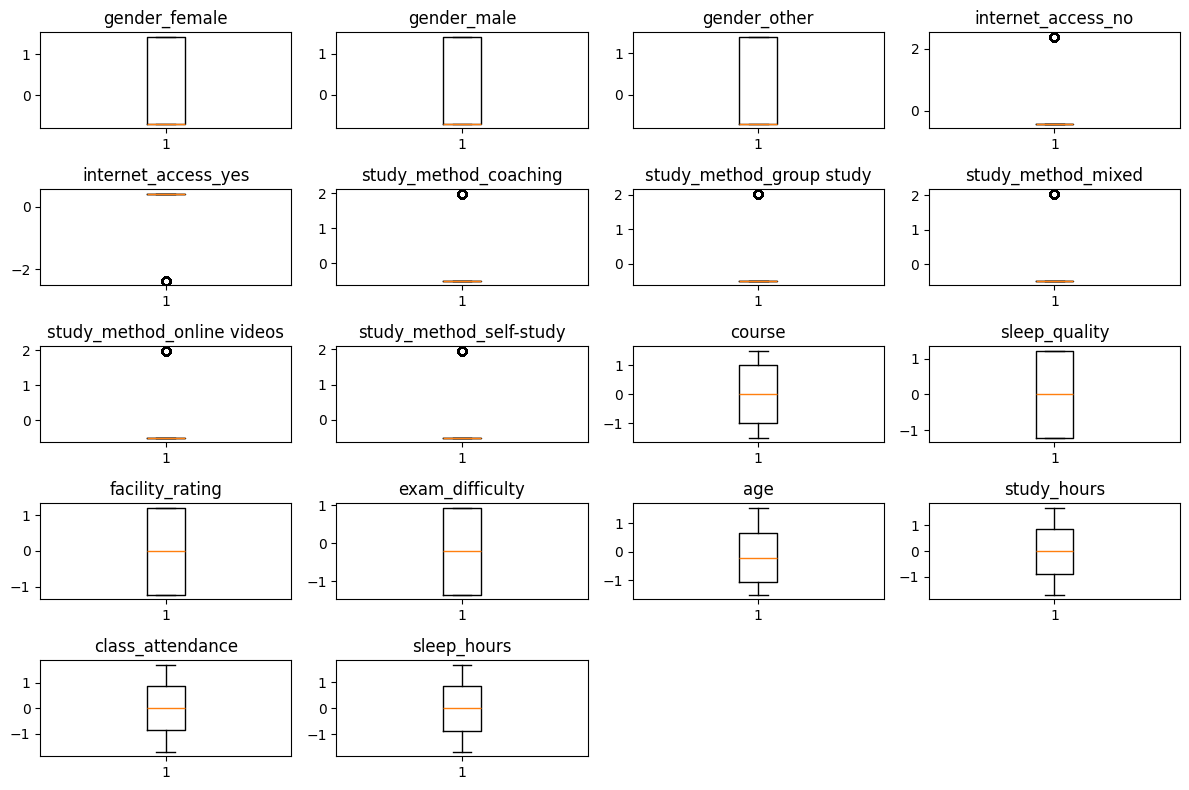

In [33]:
plt.figure(figsize=(12,8))
for i ,col in enumerate(t_data.columns):
    plt.subplot(5,4,i+1)
    plt.boxplot(t_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()
    
   

#  Ridge Regression


In [136]:
pip=Pipeline([
("preprocessing",preprocessing),
("model",Ridge())])
pip.fit(x_train,y_train)
r_pred=pip.predict(x_test)
a_score=r2_score(y_test,r_pred)
a_score=r2_score(y_test,r_pred)
mse_score=mean_squared_error(y_test,r_pred)
mae_score=mean_absolute_error(y_test,r_pred)
print(f"r2_score:{a_score}")
print(f"mean_squared_error:{mse_score}")
print(f"mean_absolute_error:{mae_score}")



r2_score:0.678194960447662
mean_squared_error:115.10870296760308
mean_absolute_error:8.655790527745546


# Lasso regression

In [142]:
pip=Pipeline([
("preprocessing",preprocessing),
("model",Lasso())])
pip.fit(x_train,y_train)
la_pred=pip.predict(x_test)
a_score=r2_score(y_test,al_pred)
a_score=r2_score(y_test,la_pred)
mse_score=mean_squared_error(y_test,la_pred)
mae_score=mean_absolute_error(y_test,la_pred)
print(f"r2_score:{a_score}")
print(f"mean_squared_error:{mse_score}")
print(f"mean_absolute_error:{mae_score}")

r2_score:0.6566153941452997
mean_squared_error:122.82764947982615
mean_absolute_error:9.0066252209137
